# Homework II - Programming and critical analysis


## Exercise 1

### a)

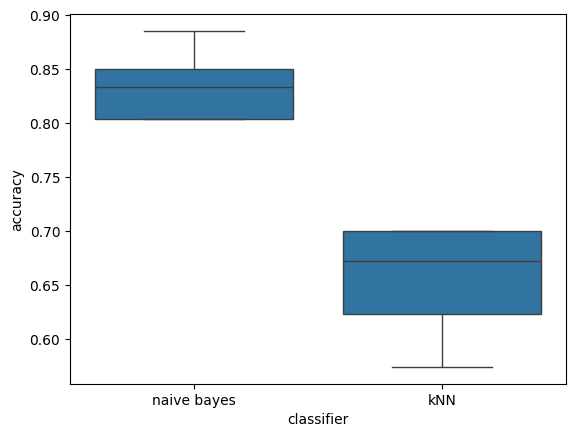

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes, neighbors
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

hddf = pd.read_csv('heart-disease.csv')
features = hddf.drop('target', axis=1)
target = hddf['target']

nb_classifier = naive_bayes.GaussianNB()

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)

folds = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=0
)

knn_results = list(cross_val_score(knn_classifier, features, target, cv=folds))
nb_results = list(cross_val_score(nb_classifier, features, target, cv=folds))

sns.boxplot(
    data=pd.DataFrame({
    'accuracy': nb_results + knn_results,
    'classifier': ['naive bayes' for x in nb_results] + (['kNN' for x in knn_results])
    }),
    x='classifier',
    y='accuracy'
)
plt.show()

### b)

kNN average accuracy: 0.82
Naive bayes average accuracy: 0.84


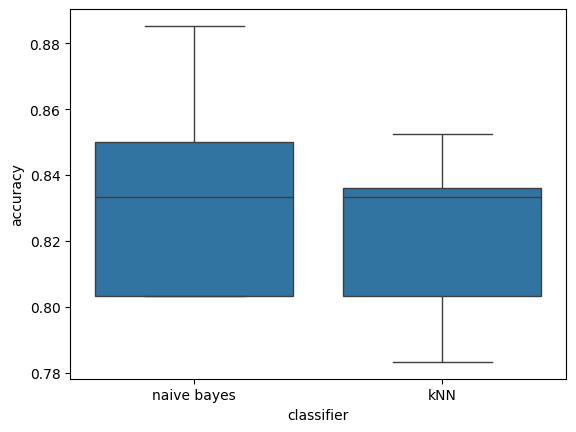

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes, neighbors
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

hddf = pd.read_csv('heart-disease.csv')
features = hddf.drop('target', axis=1)
features = pd.DataFrame(MinMaxScaler().fit(features).transform(features), columns=features.columns)
target = hddf['target']

nb_classifier = naive_bayes.GaussianNB()

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)

folds = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=0
)

knn_results = list(cross_val_score(knn_classifier, features, target, cv=folds))
nb_results = list(cross_val_score(nb_classifier, features, target, cv=folds))

print(f"kNN average accuracy: {round(sum(knn_results) / len(knn_results), 2)}")
print(f"Naive bayes average accuracy: {round(sum(nb_results) / len(nb_results), 2)}")

sns.boxplot(
    data=pd.DataFrame({
    'accuracy': nb_results + knn_results,
    'classifier': ['naive bayes' for x in nb_results] + (['kNN' for x in knn_results])
    }),
    x='classifier',
    y='accuracy'
)
plt.show()

### c)

In [4]:
from sklearn import naive_bayes, neighbors
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_rel
import pandas as pd

hddf = pd.read_csv('heart-disease.csv')

features = hddf.drop('target', axis=1)
features = pd.DataFrame(MinMaxScaler().fit(features).transform(features), columns=features.columns)
target = hddf['target']

folds = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=0
)

nb_classifier = naive_bayes.GaussianNB()
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_results = cross_val_score(knn_classifier, features, target, cv=folds)
nb_results = cross_val_score(nb_classifier, features, target, cv=folds)

print(ttest_rel(knn_results, nb_results, alternative='greater'))

TtestResult(statistic=-0.7270523395133756, pvalue=0.7462688051215336, df=4)


## Exercise 2


### a)

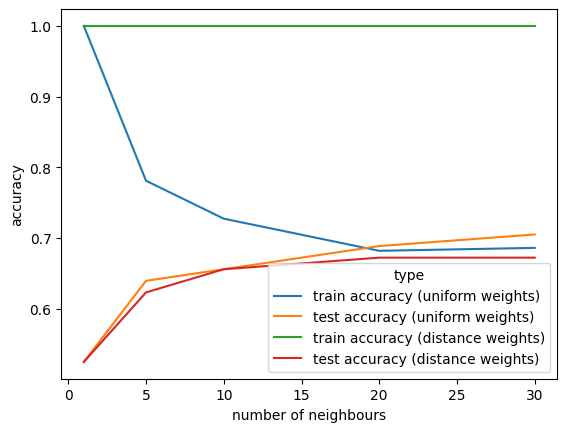

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split 
import pandas as pd

hddf = pd.read_csv('heart-disease.csv')
features = hddf.drop('target', axis=1)
target = hddf['target']

feat_train, feat_test, target_train, target_test = train_test_split(
    features,
    target,
    train_size=0.8,
    random_state=0
)

ks = (1, 5, 10, 20, 30)
train_accuracies, test_accuracies = [], []
train_accuracies_dist, test_accuracies_dist = [], []

for k in ks:
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    classifier.fit(feat_train, target_train)
    train_acc = metrics.accuracy_score(target_train, classifier.predict(feat_train))
    test_acc = metrics.accuracy_score(target_test, classifier.predict(feat_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    classifier.fit(feat_train, target_train)
    train_acc = metrics.accuracy_score(target_train, classifier.predict(feat_train))
    test_acc = metrics.accuracy_score(target_test, classifier.predict(feat_test))
    train_accuracies_dist.append(train_acc)
    test_accuracies_dist.append(test_acc)

accdf = pd.DataFrame({
    'number of neighbours': ks,
    'train accuracy (uniform weights)': train_accuracies,
    'test accuracy (uniform weights)': test_accuracies,
    'train accuracy (distance weights)': train_accuracies_dist,
    'test accuracy (distance weights)': test_accuracies_dist
})

accdf = pd.melt(
    accdf,
    id_vars='number of neighbours',
    value_vars=[
        'train accuracy (uniform weights)',
        'test accuracy (uniform weights)',
        'train accuracy (distance weights)',
        'test accuracy (distance weights)'
    ], var_name='type',
    value_name='accuracy'
)

sns.lineplot(data=accdf, x='number of neighbours', y='accuracy', hue='type', markers='o')
plt.show()